In [7]:
# Importação das bibliotecas
import numpy as np 
import cv2
from matplotlib import pyplot as plt
import os
import glob
import pathlib
from skimage import filters
import numpy as np
import cv2
from skimage.filters import sobel
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.color import label2rgb


In [37]:
def load_data(datadir):
    img_array = []
    path = os.path.join(datadir)
    path_list  = list(os.listdir(path))
    for img in path_list:
        img_array.append(cv2.imread(os.path.join(path, img)))
    return img_array

imgs_seg = load_data('imagens-cor-segmentacao')

In [4]:
img = imgs_seg[0]
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

(-0.5, 480.5, 320.5, -0.5)

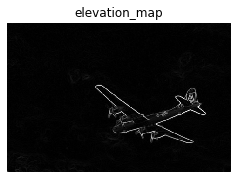

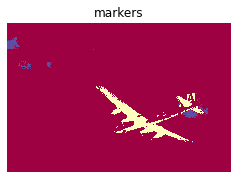

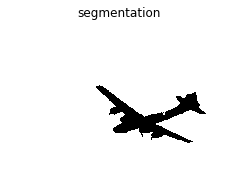

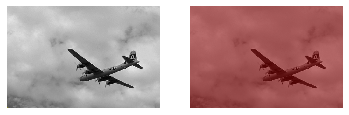

In [16]:
from skimage.filters import sobel
from skimage import morphology
from scipy import ndimage as ndi
from skimage.segmentation import watershed
#from skimage.morphology import watershed

imgs_seg1 = cv2.cvtColor(imgs_seg[3],cv2.COLOR_BGR2GRAY)
elevation_map = sobel(imgs_seg1)

fig, ax = plt.subplots(figsize=(4, 3))

ax.imshow(elevation_map, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('elevation_map')

markers = np.zeros_like(imgs_seg1)
markers[imgs_seg1 < 30] = 1
markers[imgs_seg1 > 150] = 2

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(markers, cmap=plt.cm.get_cmap("Spectral"), interpolation='nearest')
ax.axis('off')
ax.set_title('markers')

segmentation = watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(segmentation, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('segmentation')

from skimage.color import label2rgb

segmentation = ndi.binary_fill_holes(segmentation - 1)
labeled_coins, _ = ndi.label(segmentation)
image_label_overlay = label2rgb(labeled_coins, image=imgs_seg1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3), sharex=True, sharey=True)
ax1.imshow(imgs_seg1, cmap=plt.cm.gray, interpolation='nearest')
ax1.contour(segmentation, [0.5], linewidths=1.2, colors='y')
ax1.axis('off')
#ax1.set_adjustable('box-forced')
ax2.imshow(image_label_overlay, interpolation='nearest')
ax2.axis('off')
#ax2.set_adjustable('box-forced')
#fig.subplots_adjust(**margins)

In [5]:
import cv2
import numpy as np

def get8n(x, y, shape):
    out = []
    maxx = shape[1]-1
    maxy = shape[0]-1
    
    #top left
    outx = min(max(x-1,0),maxx)
    outy = min(max(y-1,0),maxy)
    out.append((outx,outy))
    
    #top center
    outx = x
    outy = min(max(y-1,0),maxy)
    out.append((outx,outy))
    
    #top right
    outx = min(max(x+1,0),maxx)
    outy = min(max(y-1,0),maxy)
    out.append((outx,outy))
    
    #left
    outx = min(max(x-1,0),maxx)
    outy = y
    out.append((outx,outy))
    
    #right
    outx = min(max(x+1,0),maxx)
    outy = y
    out.append((outx,outy))
    
    #bottom left
    outx = min(max(x-1,0),maxx)
    outy = min(max(y+1,0),maxy)
    out.append((outx,outy))
    
    #bottom center
    outx = x
    outy = min(max(y+1,0),maxy)
    out.append((outx,outy))
    
    #bottom right
    outx = min(max(x+1,0),maxx)
    outy = min(max(y+1,0),maxy)
    out.append((outx,outy))
    
    return out

def region_growing(img):
    seed_points = []
    outimg = np.zeros_like(img)
    #seed_points.append((seed[0], seed[1]))
    seed_points.append((seed[100], seed[50]))
    #seed_points.append((0, 0))
    processed = []
    #while(len(seed_points) > 0):
    pix = seed_points[0]
    outimg[pix[0], pix[1]] = 255
    for coord in get8n(pix[0], pix[1], img.shape):
        if img[coord[0], coord[1]] != 0:
            outimg[coord[0], coord[1]] = 255
            if not coord in processed:
                seed_points.append(coord)
            processed.append(coord)
    seed_points.pop(0)
        #cv2.imshow("progress",outimg)
        #cv2.waitKey(1)
    return outimg

def on_mouse(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        print('Seed: ' + str(x) + ', ' + str(y), img[y,x])
        clicks.append((y,x))
        
clicks = []
#image = cv2.imread('lena.bmp', 0)
gray = cv2.cvtColor(imgs_seg[1],cv2.COLOR_BGR2GRAY) 
ret, img = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
cv2.namedWindow('Input')
cv2.setMouseCallback('Input', on_mouse, 0, )
cv2.imshow('Input', img)
cv2.waitKey()
seed = clicks[-1]
out = region_growing(img)
cv2.imshow('Region Growing', out)
cv2.waitKey()
cv2.destroyAllWindows()

Seed: 143, 266 255
Seed: 246, 359 0


IndexError: tuple index out of range

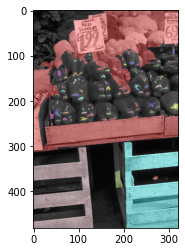

In [27]:
def cresc_reg(image):
    imgs_seg1 = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    elevation_map = sobel(imgs_seg1)
    
    markers = np.zeros_like(imgs_seg1)
    
    markers[imgs_seg1 < 30] = 1
    markers[imgs_seg1 > 150] = 2
    #print(markers[imgs_seg1 > 150])

    segmentation = watershed(elevation_map, markers)

    segmentation = ndi.binary_fill_holes(segmentation - 1)
    labeled, _ = ndi.label(segmentation)
    
    image_label_overlay = label2rgb(labeled, image=imgs_seg1)
    plt.imshow(image_label_overlay)
    #return image_label_overlay

cresc_reg(imgs_seg[1])

In [28]:
item, obj=[], []
def push(value):
    item.append(value)
    
def pop():
    return item.pop()

def size():
    return len(item)

def isEmpty():
    return size() == 0

def clear():
    item = []

In [68]:
def init(im_path,th):
    im = readImage(im_path)
    h, w,_ = im.shape
    #passedBy = np.zeros((h, w), np.double)
    #currentRegion = 0
    #iterations=0
    SEGS=np.zeros((h, w,3), dtype='uint8')
    #stack = Stack()
    thresh=float(th)
    #print(h, w)
    return im, h, w
#init('imagens-cor-segmentacao/3096.jpg', 2)

In [48]:
def readImage(img_path):
    im = cv2.imread(img_path,1)
    return im
    
def getNeighbour(x0, y0):
    neighbour = []
    for i in (-1,0,1):
        for j in (-1,0,1):
            if (i,j) == (0,0): 
                continue
            x = x0+i
            y = y0+j
            if limit(x,y):
                neighbour.append((x,y))
    return neighbour

In [71]:
def ApplyRegionGrow(im, h, w):
    passedBy = np.zeros((h, w), np.double)
    currentRegion = 0
    iterations=0
    
    randomseeds=[[h/2,w/2],[h/3,w/3],[2*h/3,w/3],[h/3-10,w/3],[h/3,2*w/3],
                 [2*h/3,2*w/3],[h/3-10,2*w/3],[h/3,w-10],[2*h/3,w-10],[h/3-10,w-10]]
    np.random.shuffle(randomseeds)
    for x0 in range(h):
        for y0 in range(w):
            if passedBy[x0,y0] == 0 and (int(im[x0,y0,0])*int(im[x0,y0,1])*int(im[x0,y0,2]) > 0) :  
                currentRegion += 1
                passedBy[x0,y0] = currentRegion
                stack.push((x0,y0))
                prev_region_count=0
                while not stack.isEmpty():
                    x,y = stack.pop()
                    BFS(x,y)
                    iterations+=1
                if(PassedAll()):
                    break
                if(prev_region_count<8*8):     
                    passedBy[passedBy==currentRegion]=0
                    x0=random.randint(x0-4,x0+4)
                    y0=random.randint(y0-4,y0+4)
                    x0=max(0,x0)
                    y0=max(0,y0)
                    x0=min(x0,h-1)
                    y0=min(y0,w-1)
                    currentRegion-=1

    for i in range(0,h):
        for j in range (0,w):
            val = passedBy[i][j]
            if(val==0):
                SEGS[i][j]=255,255,255
            else:
                SEGS[i][j]=val*35,val*90,val*30
    if(iterations>200000):
        print("Max Iterations")
    print("Iterations : "+str(iterations))
    cv2.imshow("",SEGS)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [31]:
def BFS(x0,y0):
        regionNum = passedBy[x0,y0]
        elems=[]
        elems.append((int(im[x0,y0,0])+int(im[x0,y0,1])+int(im[x0,y0,2]))/3)
        var=thresh
        neighbours=getNeighbour(x0,y0)
        
        for x,y in neighbours:
            if passedBy[x,y] == 0 and distance(x,y,x0,y0)<var:
                if(PassedAll()):
                    break;
                passedBy[x,y] = regionNum
                stack.push((x,y))
                elems.append((int(im[x,y,0])+int(im[x,y,1])+int(im[x,y,2]))/3)
                var=np.var(elems)
                prev_region_count+=1
            var=max(var,thresh)

In [72]:
def PassedAll():
    return iterations>200000 or np.count_nonzero(passedBy > 0) == w*h

def limit(self, x,y):
    return  0<=x<h and 0<=y<w
def distance(self,x,y,x0,y0):
    return ((int(im[x,y,0])-int(im[x0,y0,0]))**2+(int(im[x,y,1])-int(im[x0,y0,1]))**2+(int(im[x,y,2])-int(im[x0,y0,2]))**2)**0.5

#exemple = regionGrow(sys.argv[1],sys.argv[2])
#exemple.ApplyRegionGrow()
im, h, w = init('imagens-cor-segmentacao/3096.jpg', 2)
print(h)
ApplyRegionGrow(im, h, w)

321


NameError: name 'stack' is not defined